In [1]:
from PIL import Image, ImageDraw
import numpy as np

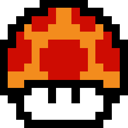

In [28]:
im = Image.open("life.png")
w, h = im.size
im

In [24]:
def pixMatrix(im):
    w, h = im.size
    pix = np.zeros((w, h, 4))
    for i in range(w):
        for j in range(h):
            pix[i, j] = im.getpixel((i, j))
    return pix

In [25]:
def submatrix(x, depth=0, maxdepth=True):
    if 2**depth <= x.shape[0] and maxdepth:
        scl = int(w/(2**depth))
        return np.array([x[j*scl:(j+1)*scl, i*scl:(i+1)*scl].mean(axis=(0,1)).astype(int)
                      for j in range(2**depth)
                      for i in range(2**depth)]).reshape((2**depth, 2**depth, 4))
    else:
        return x

In [26]:
def draw(file, depth):
    im = Image.open(file)
    pix = pixMatrix(im)
    nm = Image.new('RGBA', im.size, (255,255,255,0))
    sub = submatrix(pix, depth)
    dr = ImageDraw.Draw(nm)
    n = 2**depth
    print(n)
    for i in range(n):
        for j in range(n):
            dr.rectangle(((i*w/n, j*w/n), ((i+1)*w/n, (j+1)*w/n)), fill=tuple(sub[i,j]))
    return nm

4


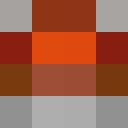

In [92]:
draw("life.png", 2)

In [59]:
def rot(n, x, y, rx, ry):
    if ry == 0:
        if rx == 1:
            x = n - 1 - x
            y = n - 1 - y
        return y, x
    return x, y

In [71]:
def xy2d(n, x, y):
    d = 0
    s = int(n/2)
    while s > 0:
        rx = (x & s) > 0
        ry = (y & s) > 0
        d += s * s * ((3 * rx) ^ ry)
        rot(s, x, y, rx, ry)
        s = int(s/2)
    return d;

In [99]:
def colorVector(file, depth):
    im = Image.open(file)
    px = pixMatrix(im)
    ma = submatrix(px, depth)
    N = 2**depth
    freq = np.zeros(N*N*4).reshape(N*N, 4)
    for i in range(N):
        for j in range(N):
            freq[xy2d(N, i, j)] = ma[i, j]
    return freq

In [150]:
def drawV(v):
    sz = im.size[1]/np.log2(v.size/4)
    nm = Image.new('RGBA', (int(sz*v.size/4), int(sz)), (255,255,255,0))
    dr = ImageDraw.Draw(nm)
    for i in range(int(v.size/4)):
        dr.rectangle(((i*sz, 0), ((i+1)*sz), sz), fill=tuple(v[i]))
    return nm

8


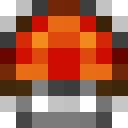

In [153]:
draw("life.png", 3)

In [152]:
drawV(colorVector("life.png", 3).astype(int))